## Day 30 Lecture 1 Assignment

In this assignment, we will build our first random forest model. We will use a dataset containing churn information for a telephone company's customers.

In [ ]:
%matplotlib inline

import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# supress warnings (warnings do not prevent the code from executing)
import warnings
warnings.filterwarnings("ignore")

Read in the telecom churn dataset.

https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/telecom_churn.csv

In [ ]:
# answer here
churn = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/telecom_churn.csv')

churn.info()
churn.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


Perform the following preprocessing steps:

- This dataset has many columns; identify a subset of 10-15 features that you think could affect a customer's propensity to churn (also called "customer loss" or "customer attrition"). Include at least 1 categorical variable.
- Drop all rows that containing any missing values (this should be a fairly small number of rows)
- Convert the response from a string to a binary 1-0 encoding.

In [ ]:
churn.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [ ]:
# answer goes here
churn = churn[['Churn','MonthlyRevenue','MonthlyMinutes', 'TotalRecurringCharge', 'BlockedCalls', 'ActiveSubs', 'ChildrenInHH', 
              'HasCreditCard', 'RetentionCalls', 'RetentionOffersAccepted', 'IncomeGroup', 'Occupation','MaritalStatus']]

churn.dropna(inplace=True)

In [ ]:
churn.isnull().sum()

In [ ]:
churn['Churn'] = churn['Churn'].map({"Yes": 1, "No": 0})

Although some implementations of tree-based models support categorical variables directly, scikit-learn's implementation does not, so we will need to convert our categorical variable(s) into numbers. In linear regression, we used one-hot/dummy encoding, but this has drawbacks that can be particularly problematic in the context of trees. Namely, dummy encoding can lead to very sparse columns when dealing with high-dimensional categorical features; the tree treats these levels as indepedent features is very unlikely to make a split on any of the individual levels, since the corresponding columns consist almost entirely consist of a single value.

Ideally, we would consider all of the levels simultaneously, which trees can do efficiently. However, sklearn does not implement this efficient algorithm for splitting on categorical variables. In this situation, a better alternative to dummy encoding is leave-one-out-encoding. This transforms each categorical into its conditional probability of the positive class, excluding the observation itself to avoid potential data leakage. Perform the following steps:

- Create an 80-20 train/test split on the data
- Fit a leave-one-out encoder to the training data and encode the categorical variables in the training data. The category_encoders package is helpful for this task. (Note that this ordering is important; if we fitted the encoder to the full dataset before making the train/test split, we would introduce data leakage by allowing the test data to affecting the estimates of the category-conditional probabilities.)

In [ ]:
# answer goes here
from sklearn.model_selection import train_test_split

X = churn.drop('Churn',axis=1)
y = churn['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)




In [ ]:
!pip install category_encoders

     |████████████████████████████████| 81kB 2.2MB/s 


In [ ]:
from category_encoders.leave_one_out import LeaveOneOutEncoder

cat_encode = LeaveOneOutEncoder()

cat_encode.fit(X_train, y_train)

X_train_encode = cat_encode.transform(X_train)

In [ ]:
X_test_encode = cat_encode.transform(X_test)

Next, fit the random forest model. You can tinker with or tune the parameters if you like, although we will use the default parameter values.

In [ ]:
# answer goes here
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

forest.fit(X_train_encode, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

To evaluate our model, produce the predicted values for the test sample. Remember to apply our previously fitted encoder to the test data prior to making predictions.

In [26]:
# answer goes here
from sklearn.metrics import classification_report

y_pred = forest.predict(X_test_encode)

After making the predictions, print out the classification report (sklearn.metrics.classification_report). In addition, plot the confusion matrix and ROC curve. How did our model perform?

              precision    recall  f1-score   support

           0       0.72      0.93      0.81      7232
           1       0.37      0.10      0.15      2947

    accuracy                           0.69     10179
   macro avg       0.55      0.52      0.48     10179
weighted avg       0.62      0.69      0.62     10179



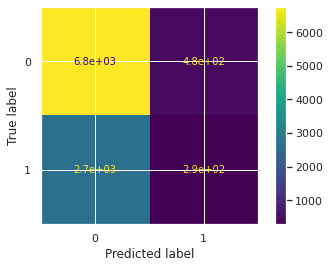

In [31]:
# answer goes here
from sklearn.metrics import plot_confusion_matrix

print(classification_report(y_test, y_pred))

plot_confusion_matrix(forest, X_test_encode, y_test)
plt.show()

Print the feature importances, ordered by importance from high to low. What is the default sklearn feature importance metric?

In [34]:
# answer goes here
pd.Series(forest.feature_importances_, index=X_train_encode.columns).sort_values(ascending=False)




MonthlyMinutes             0.271945
MonthlyRevenue             0.263362
BlockedCalls               0.142094
TotalRecurringCharge       0.115807
IncomeGroup                0.080341
Occupation                 0.040824
ActiveSubs                 0.026465
MaritalStatus              0.023018
ChildrenInHH               0.015796
HasCreditCard              0.012554
RetentionCalls             0.005815
RetentionOffersAccepted    0.001979
dtype: float64